## 1.  Set Partitioning

I chose per3 and control3 as my favorites. Although I could hold the per3 as it is, I
needed to change the control3 with 5 fuzzy sets: 1,2,3,4 and 5. While increasing to 5
fuzzy sets, I considered its characteristics: smooth transitions and overlap case. The
snapshot of the code is given below:

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


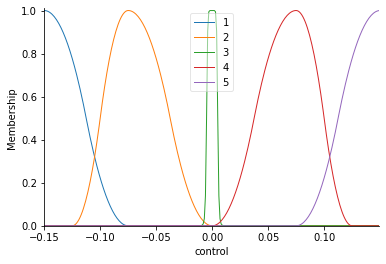

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import ticker
import math

# 5 partitioning sets olmalı
u=ctrl.Consequent(np.arange(-0.15,0.15,0.001), 'control')
u['1'] = fuzz.smf(-u.universe, 0.075, 0.15)
u['2']=fuzz.pimf(u.universe,-0.125,-0.075,-0.075, 0)
u['3']=fuzz.gbellmf(u.universe,0.005, 5 ,0)
u['4']=fuzz.pimf(u.universe,0, 0.075,0.075, 0.125)
u['5'] = fuzz.smf(u.universe, 0.075 , 0.15)
u.view()

In this part of the homework, we needed to consider the disappearance rate. As per1 has
sharp edges, I compare 6 different cases for the current effective infection rate. Table-3
illustrates them. Partitioning has similar logic with another input. Its fuzzy sets make sense
while describing the rules.

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


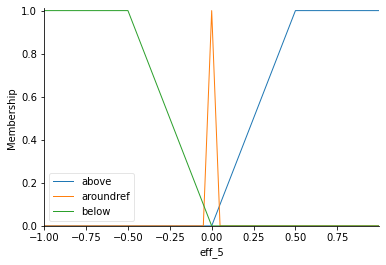

In [2]:
de_5=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_5')
de_5['above']=fuzz.trapmf(de_5.universe, [0,0.5,1,1])
de_5['aroundref']=fuzz.trimf(de_5.universe, [-0.05,0.0,0.05])
de_5['below']=fuzz.trapmf(de_5.universe, [-1,-1,-0.5,0])
de_5.view()

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


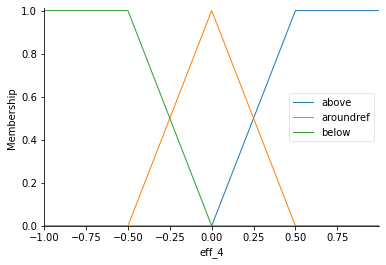

In [3]:
de_4=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_4')
de_4['above']=fuzz.trapmf(de_4.universe, [0,0.5,1,1])
de_4['aroundref']=fuzz.trimf(de_4.universe, [-0.5,0.0,0.5])
de_4['below']=fuzz.trapmf(de_4.universe, [-1,-1,-0.5,0])
de_4.view()

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


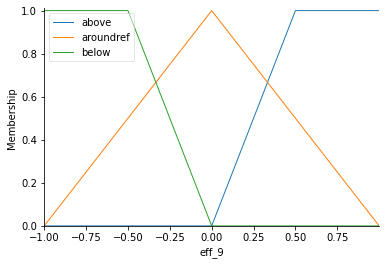

In [4]:
de_9=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_9')
de_9['above']=fuzz.trapmf(de_9.universe, [0,0.5,1,1])
de_9['aroundref']=fuzz.trimf(de_9.universe, [-1,0.0,1])
de_9['below']=fuzz.trapmf(de_9.universe, [-1,-1,-0.5,0])
de_9.view()

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


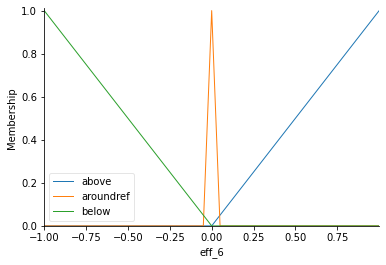

In [5]:
de_6=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_6')
de_6['above']=fuzz.trapmf(de_6.universe, [0,1,1,1])
de_6['aroundref']=fuzz.trimf(de_6.universe, [-0.05,0.0,0.05])
de_6['below']=fuzz.trapmf(de_6.universe, [-1,-1,-1,0])
de_6.view()

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


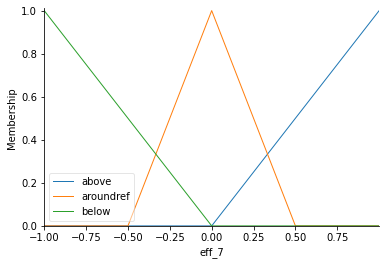

In [6]:
de_7=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_7')
de_7['above']=fuzz.trapmf(de_7.universe, [0,1,1,1])
de_7['aroundref']=fuzz.trimf(de_7.universe, [-0.5,0.0,0.5])
de_7['below']=fuzz.trapmf(de_7.universe, [-1,-1,-1,0])
de_7.view()

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


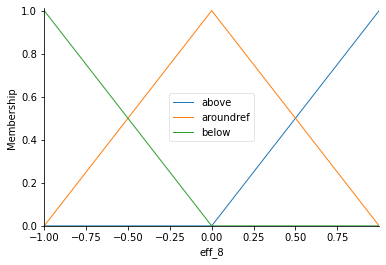

In [7]:
de_8=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_8')
de_8['above']=fuzz.trapmf(de_8.universe, [0,1,1,1])
de_8['aroundref']=fuzz.trimf(de_8.universe, [-1,0.0,1])
de_8['below']=fuzz.trapmf(de_8.universe, [-1,-1,-1,0])
de_8.view()

Their characteristics can be list as follows:
* They all have sharp edges
* Eff5,eff4 and eff9 has variant attitudes until some fixed point and then they behaves eqaul to rest of the values. Eff6, eff7 and eff8 always behaves different for different values. 
* EEff5 & eff6 consider very small value set as “around reference”. This assessment shows an increasing change in the value in Eff4 & eff7 and eff9 & eff8.

## 2. Rules

* <span style="color:orange">If the current percentage is around ref value, then do not change the infection rate.</span>
* <span style="color:purple">If the effective rate is negative then disappearance rate is bigger than infection rate. So, we need to increase the infection rate.</span>
* <span style="color:blue">If the effective rate is around zero and current perentage is below the desired value, then we should increase the infection rate but not much compare to above case. (Similar logic for above case)</span>
* <span style="color:green">If the effective rate is positive then disappearance rate is lower than infection rate. To make them equal (considering proportionality of current percentage and disappearance rate) we need to decrease the current percentage. After they are equal, the desired current percentage will arise.</span>

```python
# Define rules:
rule1=ctrl.Rule(e_x['below']&de_x['aroundref'], u_x['4'])
rule2=ctrl.Rule(e_x['below']&de_x['above'], u_x['1'])
rule3=ctrl.Rule(e_x['aroundref'], u_x['3'])
rule4=ctrl.Rule(e_x['above']&de_x['below'], u_x['5'])
rule5=ctrl.Rule(e_x['above']&de_x['aroundref'], u_x['2'])
```

|Eff Rate Current Percentage|below| aroundref|above
--- | --- | --- | ---
below|x|<span style="color:blue">4</span>|<span style="color:green">1</span>
aroundref|<span style="color:orange">3</span>|<span style="color:orange">3</span>|<span style="color:orange">3 </span> 
above|<span style="color:purple">5</span>|<span style="color:blue">2</span>|x

## 3. Fuzzification and Defuzzification Interface & Simulation

Similar process was applied for different membership functions of current effective
infection rate. One of the case’s code is given below:

In [8]:
def find_ss(b):
    """"
    Find when the viruse spread reaches the steady state:
    Assume steady state is reached if the number 0.6 comes 10
    times in a row !!!!!
    Input type : list
    """
    # round the float value to 3 decimals
    a=[]
    for i in range(len(b)):
        a.append(float("{0:.2f}".format(b[i])))
    # Create an array that is 1 where a is 0.600=0.6  (reference value), and pad each end with an extra 0.
    isref = np.concatenate(([0], np.equal(a,0.6).view(np.int8), [0]))
    absdiff = np.abs(np.diff(isref))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    ss_day=0 # ss_day may not be created in the for loop so  define in here
    for j in range(len(ranges)):
        # check whether "0.600" occurs at least 10 times
        if (ranges[j][1]-ranges[j][0])>=10:
            ss_day=ranges[j][0]
            #print("Number of days passed until the equilibrium = "+str(ss_day))
            #print("Cost = "+str(sum(b[:ss_day])))
            break # found, done !
    return ss_day

### For Eff4

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


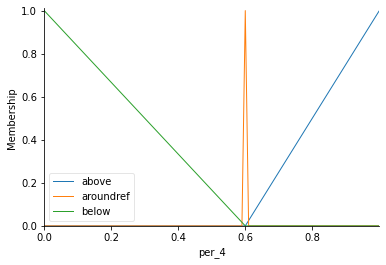

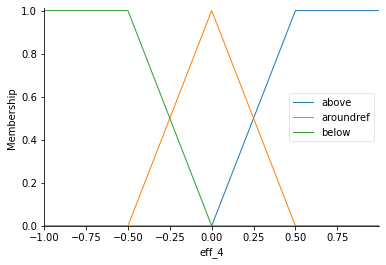

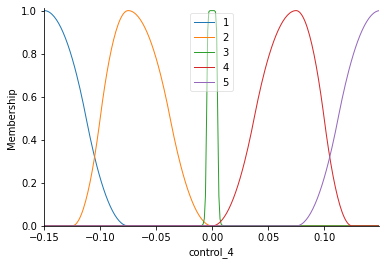

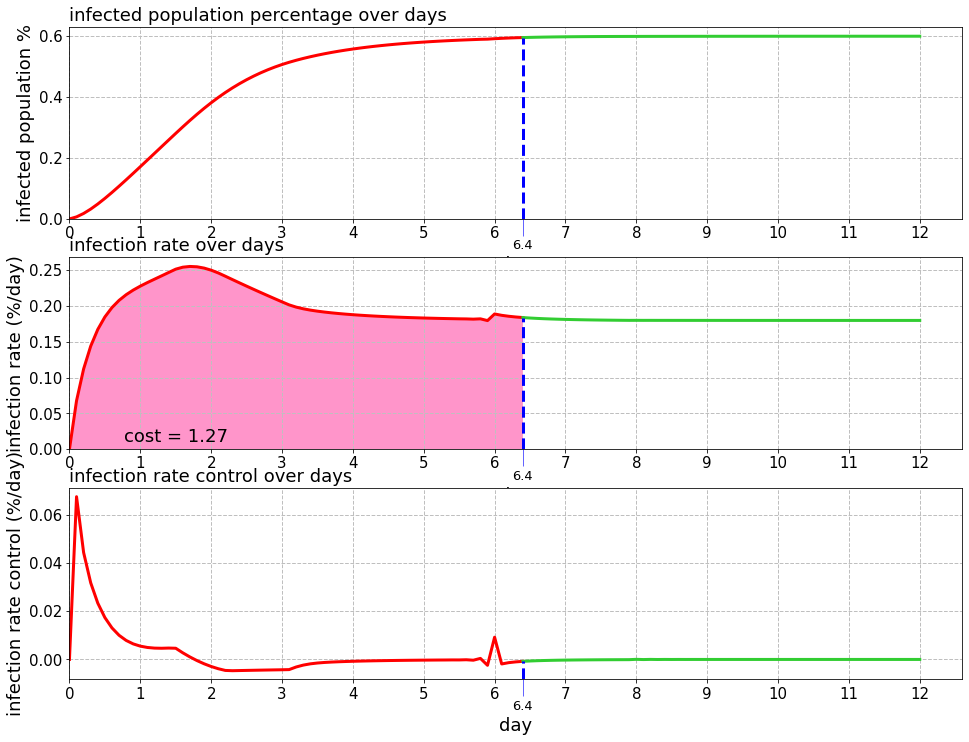

In [9]:
# from part1 take 33
e_4=ctrl.Antecedent(np.arange(0,1,0.001), 'per_4')
e_4['above']=fuzz.trapmf(e_4.universe, [0.6,1,1,1])
e_4['aroundref']=fuzz.trimf(e_4.universe, [0.59,0.6,0.61])
e_4['below']=fuzz.trapmf(e_4.universe, [0,0,0,0.6])
e_4.view()
de_4=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_4')
de_4['above']=fuzz.trapmf(de_4.universe, [0,0.5,1,1])
de_4['aroundref']=fuzz.trimf(de_4.universe, [-0.5,0.0,0.5])
de_4['below']=fuzz.trapmf(de_4.universe, [-1,-1,-0.5,0])
de_4.view()
# 5 partitioning sets
u_4=ctrl.Consequent(np.arange(-0.15,0.15,0.001), 'control_4')
u_4['1'] = fuzz.smf(-u_4.universe, 0.075, 0.15)
u_4['2']=fuzz.pimf(u_4.universe,-0.125,-0.075,-0.075, 0)
u_4['3']=fuzz.gbellmf(u_4.universe,0.005, 5 ,0)
u_4['4']=fuzz.pimf(u_4.universe,0, 0.075,0.075, 0.125)
u_4['5'] = fuzz.smf(u_4.universe, 0.075 , 0.15)
u_4.view()
# Define rules:
rule1=ctrl.Rule(e_4['below']&de_4['aroundref'], u_4['4'])
rule2=ctrl.Rule(e_4['below']&de_4['above'], u_4['1'])
rule3=ctrl.Rule(e_4['aroundref'], u_4['3'])
rule4=ctrl.Rule(e_4['above']&de_4['below'], u_4['5'])
rule5=ctrl.Rule(e_4['above']&de_4['aroundref'], u_4['2'])
viruse_ctrl_4=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
from plague import Plague
kill_bots_4=Plague()
# Simulate the control system:
viruse_sim_4=ctrl.ControlSystemSimulation(viruse_ctrl_4)
day=120 # Number of days
per=0 # Initial percentage
eff=0
for day in range(day):
    viruse_sim_4.input['per_4'] = per
    viruse_sim_4.input['eff_4'] = eff
    viruse_sim_4.compute()
    x=viruse_sim_4.output['control_4']
    # update values, call method
    kill_bots_4.spreadPlague(x)
    # learn the new percentage, per
    (per, eff)=kill_bots_4.checkInfectionStatus()
    # So (change in the percentage)/(for one day)=per-first_per
#plt.plot(kill_bots.infected_percentage_curve_)
ss_Day_4=find_ss(kill_bots_4.infected_percentage_curve_)
c_4=sum(kill_bots_4.infection_rate_curve_[:ss_Day_4])
c_4=c_4/10
kill_bots_4.viewPlague(point_ss=ss_Day_4, plague_cost=c_4,
save_dir='./', filename='part2_Eff4',
show_plot=True)


### For Eff7

/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cagnur/anaconda3/envs/dl/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


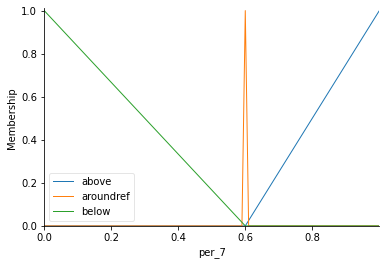

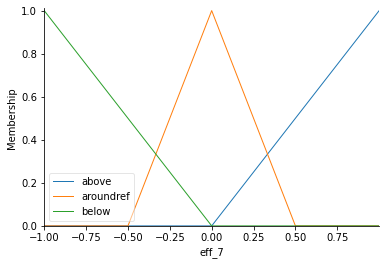

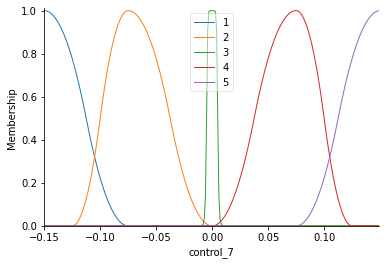

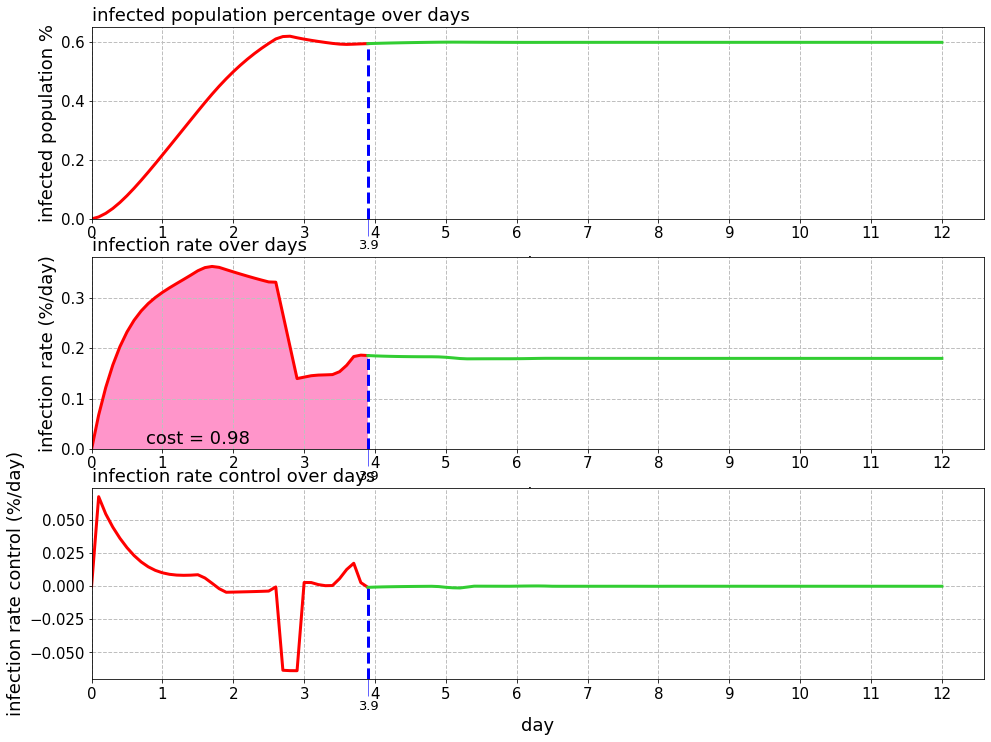

In [10]:
e_7=ctrl.Antecedent(np.arange(0,1,0.001), 'per_7')
e_7['above']=fuzz.trapmf(e_7.universe, [0.6,1,1,1])
e_7['aroundref']=fuzz.trimf(e_7.universe, [0.59,0.6,0.61])
e_7['below']=fuzz.trapmf(e_7.universe, [0,0,0,0.6])
e_7.view()
de_7=ctrl.Antecedent(np.arange(-1,1,0.001), 'eff_7')
de_7['above']=fuzz.trapmf(de_7.universe, [0,1,1,1])
de_7['aroundref']=fuzz.trimf(de_7.universe, [-0.5,0.0,0.5])
de_7['below']=fuzz.trapmf(de_7.universe, [-1,-1,-1,0])
de_7.view()
# 5 partitioning
u_7=ctrl.Consequent(np.arange(-0.15,0.15,0.001), 'control_7')
u_7['1'] = fuzz.smf(-u_7.universe, 0.075, 0.15)
u_7['2']=fuzz.pimf(u_7.universe,-0.125,-0.075,-0.075, 0)
u_7['3']=fuzz.gbellmf(u_7.universe,0.005, 5 ,0)
u_7['4']=fuzz.pimf(u_7.universe,0, 0.075,0.075, 0.125)
u_7['5'] = fuzz.smf(u_7.universe, 0.075 , 0.15)
u_7.view()
# Define rules:
rule1=ctrl.Rule(e_7['below']&de_7['aroundref'], u_7['4'])
rule2=ctrl.Rule(e_7['below']&de_7['above'], u_7['1'])
rule3=ctrl.Rule(e_7['aroundref'], u_7['3'])
rule4=ctrl.Rule(e_7['above']&de_7['below'], u_7['5'])
rule5=ctrl.Rule(e_7['above']&de_7['aroundref'], u_7['2'])
viruse_ctrl_7=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
kill_bots_7=Plague()
# Simulate the control system:
viruse_sim_7=ctrl.ControlSystemSimulation(viruse_ctrl_7)
day=120 # Number of days
per=0 # Initial percentage
eff=0
for day in range(day):    
    viruse_sim_7.input['per_7'] = per
    viruse_sim_7.input['eff_7'] = eff
    viruse_sim_7.compute()
    x=viruse_sim_7.output['control_7']
    # update values, call method
    kill_bots_7.spreadPlague(x)
    # learn the new percentage, per
    (per, eff)=kill_bots_7.checkInfectionStatus()
    # So (change in the percentage)/(for one day)=per-first_per
#plt.plot(kill_bots.infected_percentage_curve_)
ss_Day_7=find_ss(kill_bots_7.infected_percentage_curve_)
c_7=sum(kill_bots_7.infection_rate_curve_[:ss_Day_7])
c_7=c_7/10
kill_bots_7.viewPlague(point_ss=ss_Day_7, plague_cost=c_7,
save_dir='./', filename='part2_Eff7',show_plot=True)

Their cost comparison is given in the following Table-3 in the repo

## Comparison

As stated in the repository it is considered as controller. You can control nonlinear systems with
this algorithm without spending much time on PID values. For part1, we have underdamped
behaviour.By adding some error value into the system, we make the system critically-
damped. This statement is shown explicitly.